**Nama: Cindy Deviana Atmakusuma**

Proyek ini menggunakan dataset dari Kaggle untuk melakukan prediksi harga rumah (apartemen) di Moscow.

Link: https://www.kaggle.com/datasets/egorkainov/moscow-housing-price-dataset

# **Import Library yang digunakan**

In [1]:
# Install public API Kaggle
!pip install -q kaggle

In [2]:
# Install library untuk proses data loading dan visualisasi data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Impor library untuk data preparation
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Impor library untuk split data
from sklearn.model_selection import train_test_split

# Impor library GridSearchCV
from sklearn.model_selection import GridSearchCV

# Impor metrik
from sklearn.metrics import mean_squared_error

# Impor model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# **Data Understanding**

Tahap ini dilakukan dalam rangka memahami informasi yang terdapat pada data dan juga berguna untuk menentukan kualitas dari data yang diperoleh.

**1. Data Loading**

Disini dataset yang digunakan akan dimuat agar dapat dipahami.

In [3]:
# Membuat direktori baru bernama kaggle
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke direktori kaggle
!mv kaggle.json ~/.kaggle/kaggle.json

# Mengubah permission berkas
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d egorkainov/moscow-housing-price-dataset

# Ekstrak berkas zip
!unzip /content/moscow-housing-price-dataset.zip

  0% 0.00/343k [00:00<?, ?B/s]
100% 343k/343k [00:00<00:00, 77.3MB/s]
Archive:  /content/moscow-housing-price-dataset.zip
  inflating: data.csv                


In [4]:
houses = pd.read_csv('/content/data.csv')
houses

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,New building,Котельники,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


**2. Exploratory Data Analysis (EDA)**

Exploratory data analysis dilakukan untuk melakukan investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

**2.1 Deskripsi Variabel**

In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [6]:
# Fitur 'Metro station' tidak memengaruhi harga apartemen, maka akan dihilangkan
houses.drop(['Metro station'], axis=1, inplace=True)

In [7]:
houses.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


**2.2 Menangani Missing Value dan Outliers**

In [8]:
min_to_metro = (houses['Minutes to metro'] == 0).sum()
num_of_rooms = (houses['Number of rooms'] == 0).sum()

print("Nilai 0 di kolom 'Minutes to metro' ada: ", min_to_metro)
print("Nilai 0 di kolom 'Number of rooms' ada: ", num_of_rooms)

Nilai 0 di kolom 'Minutes to metro' ada:  7
Nilai 0 di kolom 'Number of rooms' ada:  3731


In [9]:
houses = houses[houses['Minutes to metro']!=0]
houses = houses[houses['Number of rooms']!=0]

In [10]:
houses.shape

(18939, 11)

In [11]:
houses.duplicated().sum()

1357

In [12]:
houses.drop_duplicates()

,Price,Apartment type,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...
22668,5728683.0,New building,16.0,Moscow region,2.0,39.71,27.1,4.1,9.0,20,Cosmetic
22670,5884024.0,New building,8.0,Moscow region,1.0,44.17,24.5,10.3,4.0,17,Cosmetic
22672,5900000.0,New building,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22674,5768869.0,New building,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


In [13]:
houses.isna().sum()

Price               0
Apartment type      0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Kitchen area        0
Floor               0
Number of floors    0
Renovation          0
dtype: int64

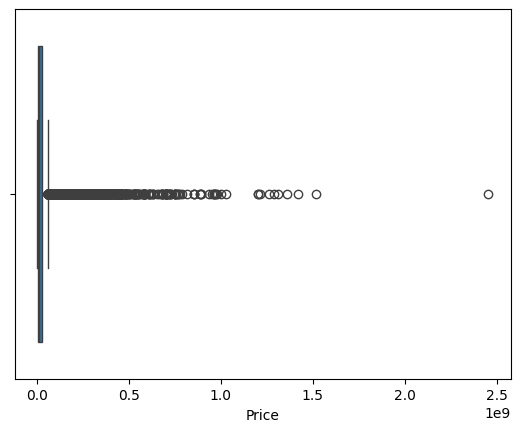

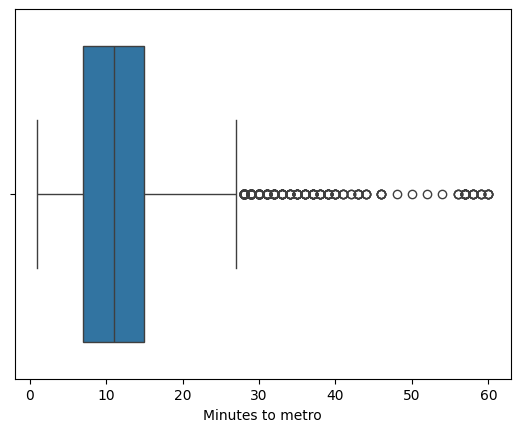

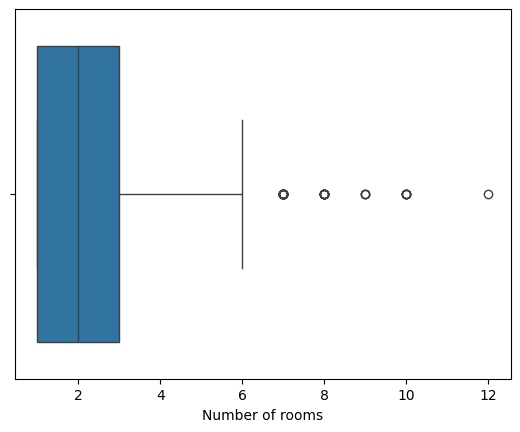

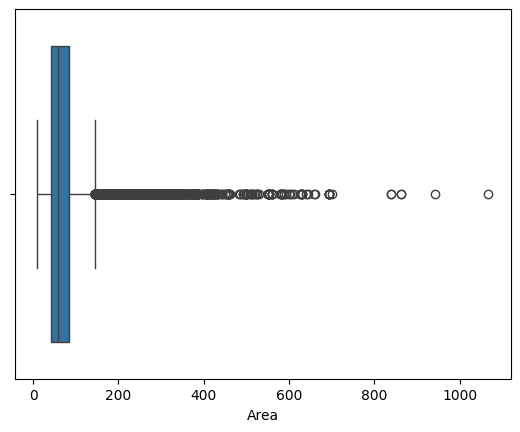

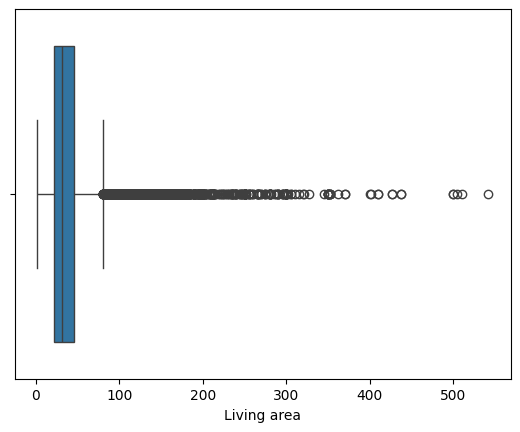

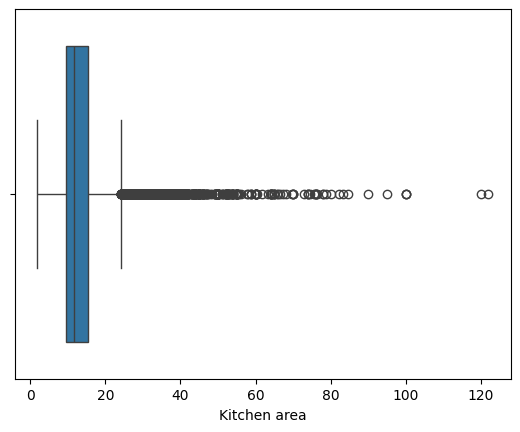

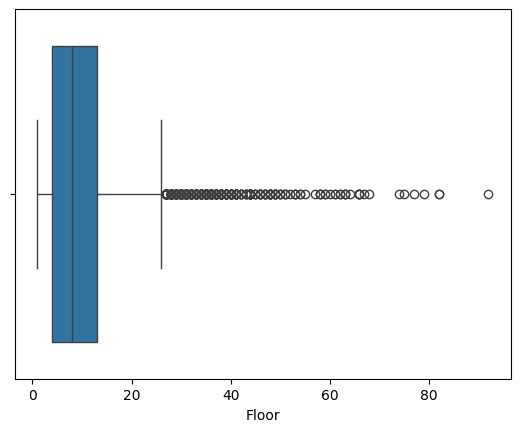

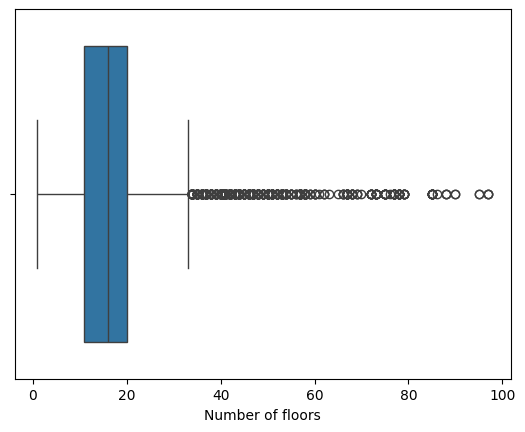

In [14]:
data = houses.select_dtypes(exclude=['object'])
for column in data:
  plt.figure()
  sns.boxplot(data=data, x=column)

In [15]:
Q1 = houses.quantile(0.25)
Q3 = houses.quantile(0.75)
IQR = Q3-Q1
houses=houses[~((houses<(Q1-1.5*IQR))|(houses>(Q3+1.5*IQR))).any(axis=1)]

<ipython-input-15-87ac55ed7830>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = houses.quantile(0.25)
<ipython-input-15-87ac55ed7830>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = houses.quantile(0.75)
<ipython-input-15-87ac55ed7830>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  houses=houses[~((houses<(Q1-1.5*IQR))|(houses>(Q3+1.5*IQR))).any(axis=1)]


In [16]:
houses.shape

(14662, 11)

# **Univariate Analysis**

Univariate Analysis merupakan proses analisis data dengan membagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [17]:
categorical_features = ['Apartment type','Region','Renovation']
numerical_features = ['Price','Minutes to metro','Number of rooms','Area','Living area','Kitchen area','Floor','Number of floors']

**1. Categorical Features**

              Jumlah sampel  Persentase
New building           8169        55.7
Secondary              6493        44.3


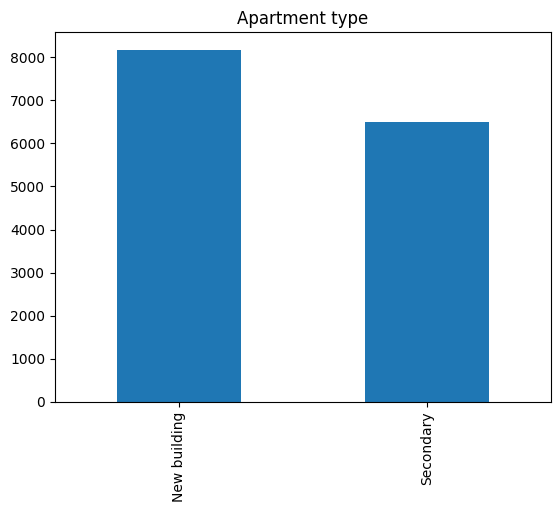

In [18]:
feature = categorical_features[0]
count = houses[feature].value_counts()
percent = 100*houses[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

               Jumlah sampel  Persentase
Moscow                  9125        62.2
Moscow region           5537        37.8


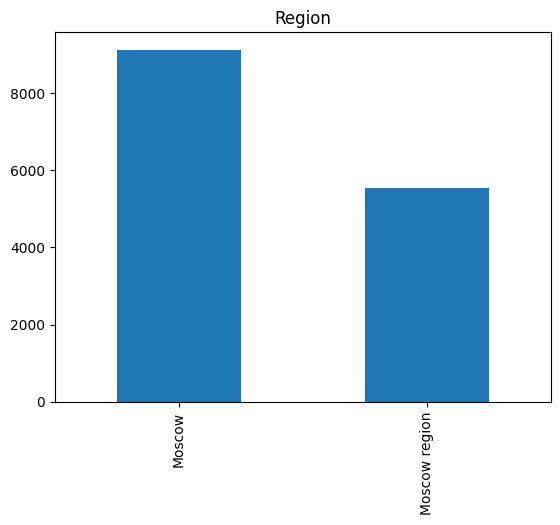

In [19]:
feature = categorical_features[1]
count = houses[feature].value_counts()
percent = 100*houses[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                           Jumlah sampel  Persentase
Cosmetic                           10577        72.1
European-style renovation           2222        15.2
Without renovation                  1106         7.5
Designer                             757         5.2


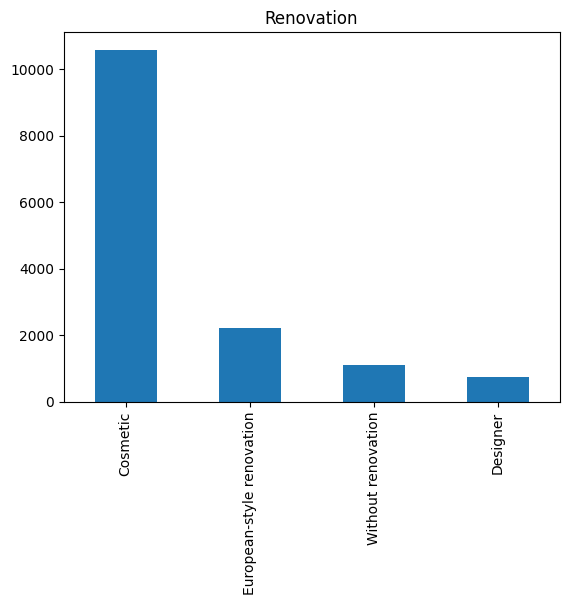

In [20]:
feature = categorical_features[2]
count = houses[feature].value_counts()
percent = 100*houses[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**2. Numerical Features**

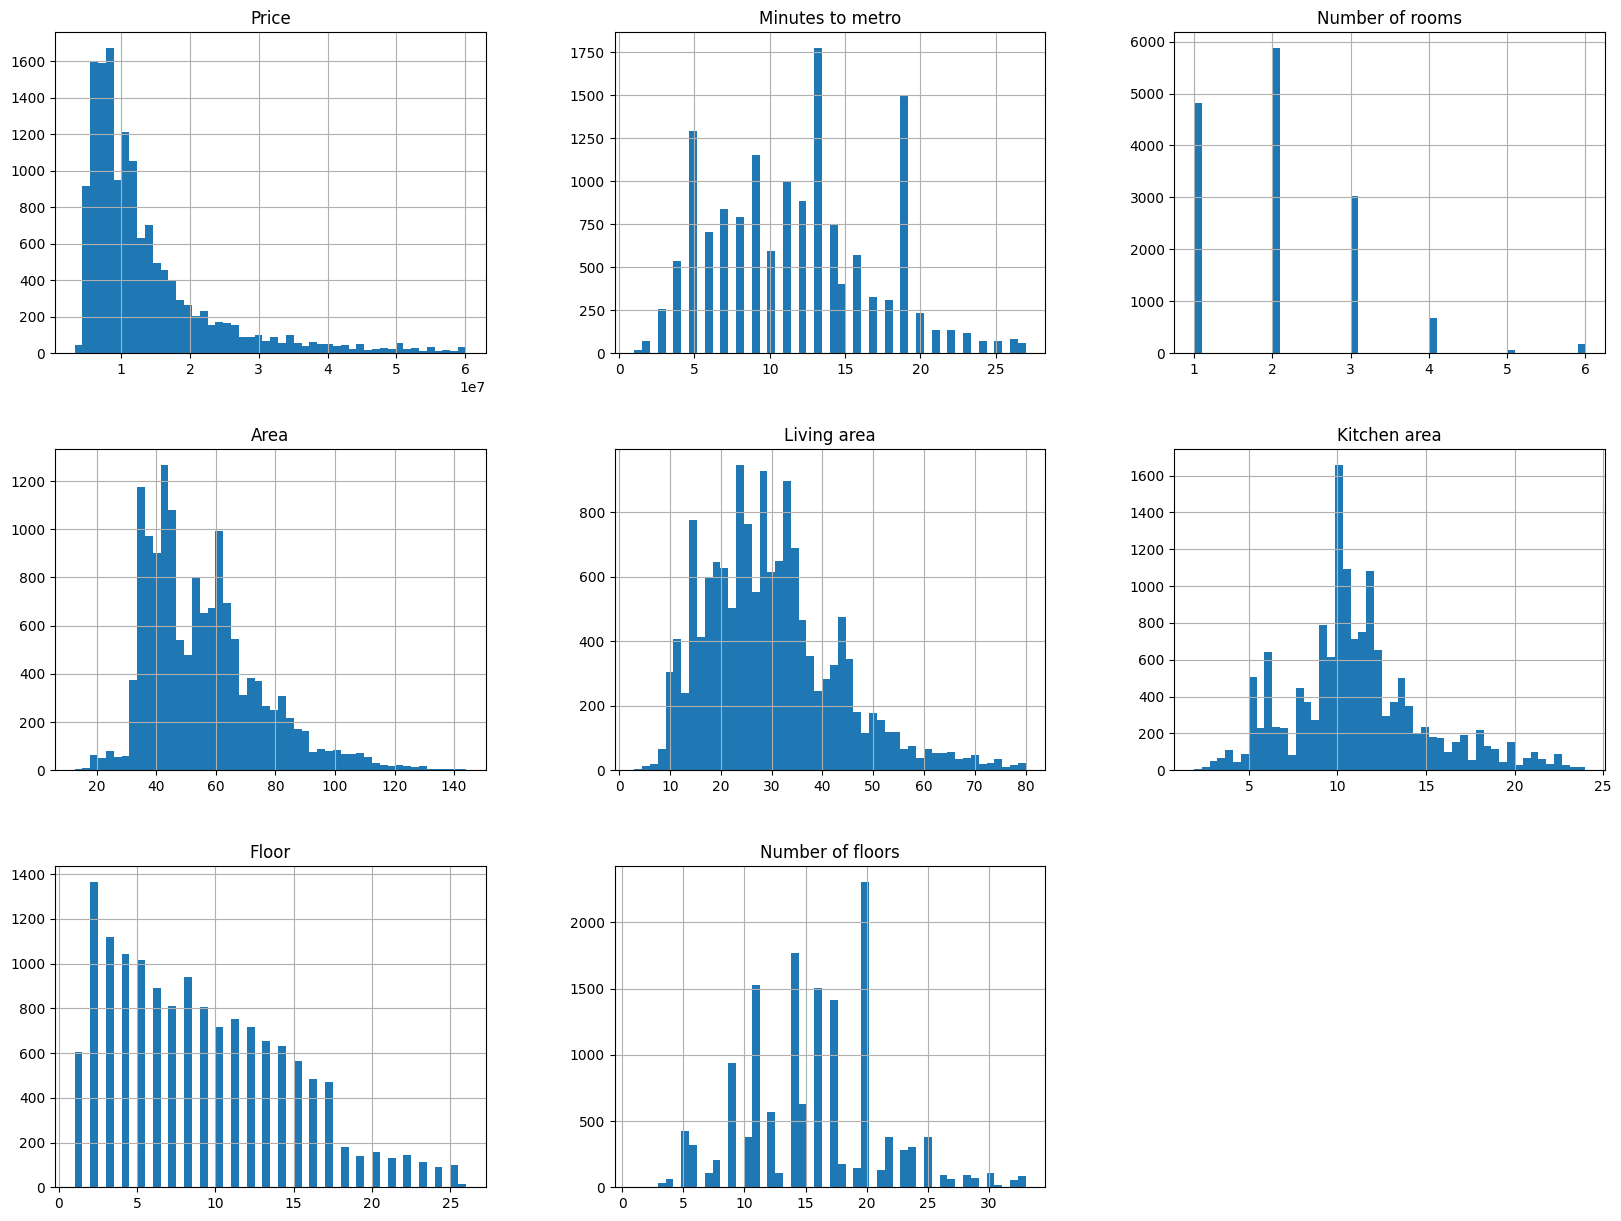

In [21]:
houses.hist(bins=50, figsize=(20,15))
plt.show()

# **Multivariate Analysis**

Multivariate Analysis merupakan jenis visualisasi data untuk menggambarkan informasi yang diperoleh pada lebih dari dua variabel. Visualisasi jenis ini digunakan untuk merepresentasikan hubungan dan pola yang terdapat dalam multidimensional data.

**1. Categorical Features**

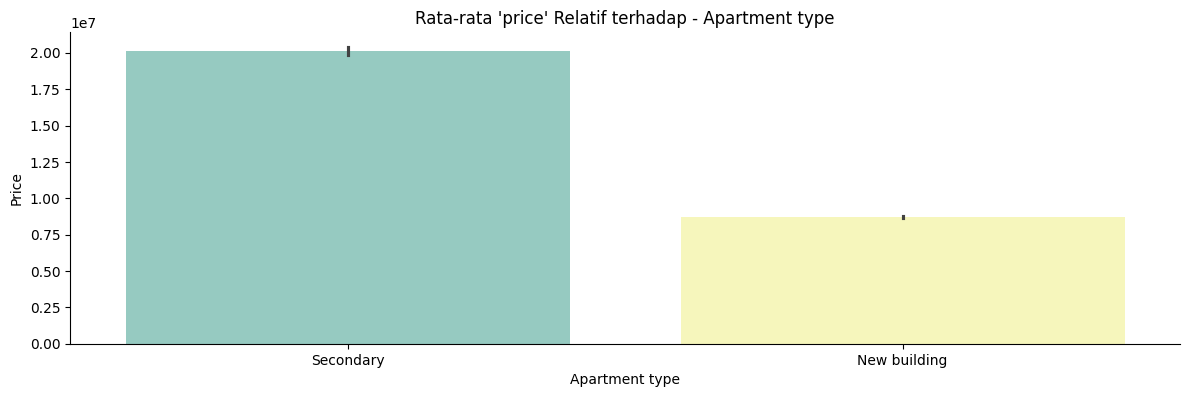

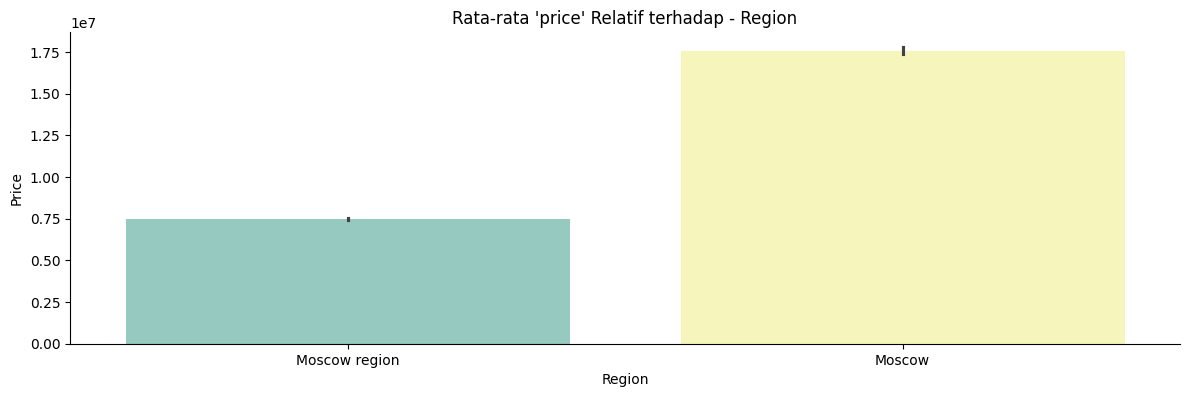

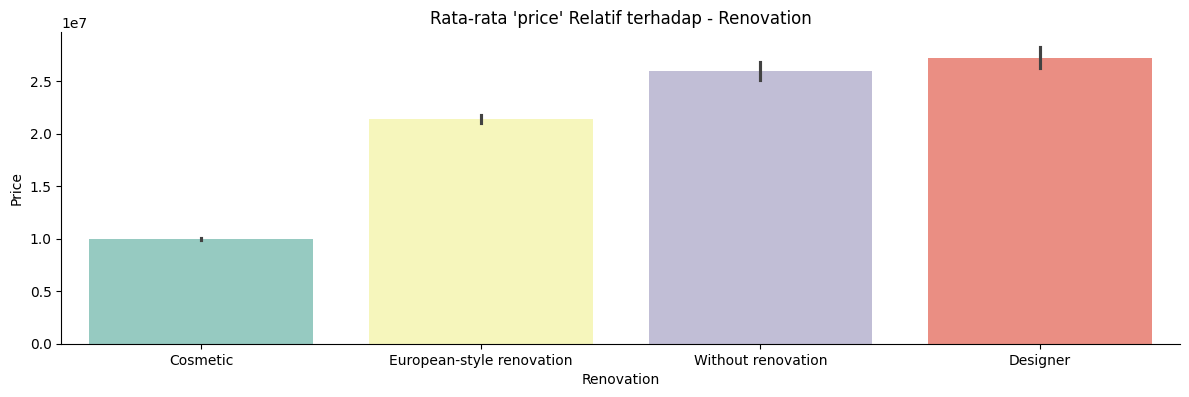

In [22]:
cat_features = houses.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    sns.catplot(x=col, y="Price", kind="bar", dodge=False, height=4, aspect=3, data=houses, hue=col, palette="Set3", legend=False)
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

**2. Numerical Features**

Mengamati hubungan antar fitur numerik dengan fungsi pairplot()

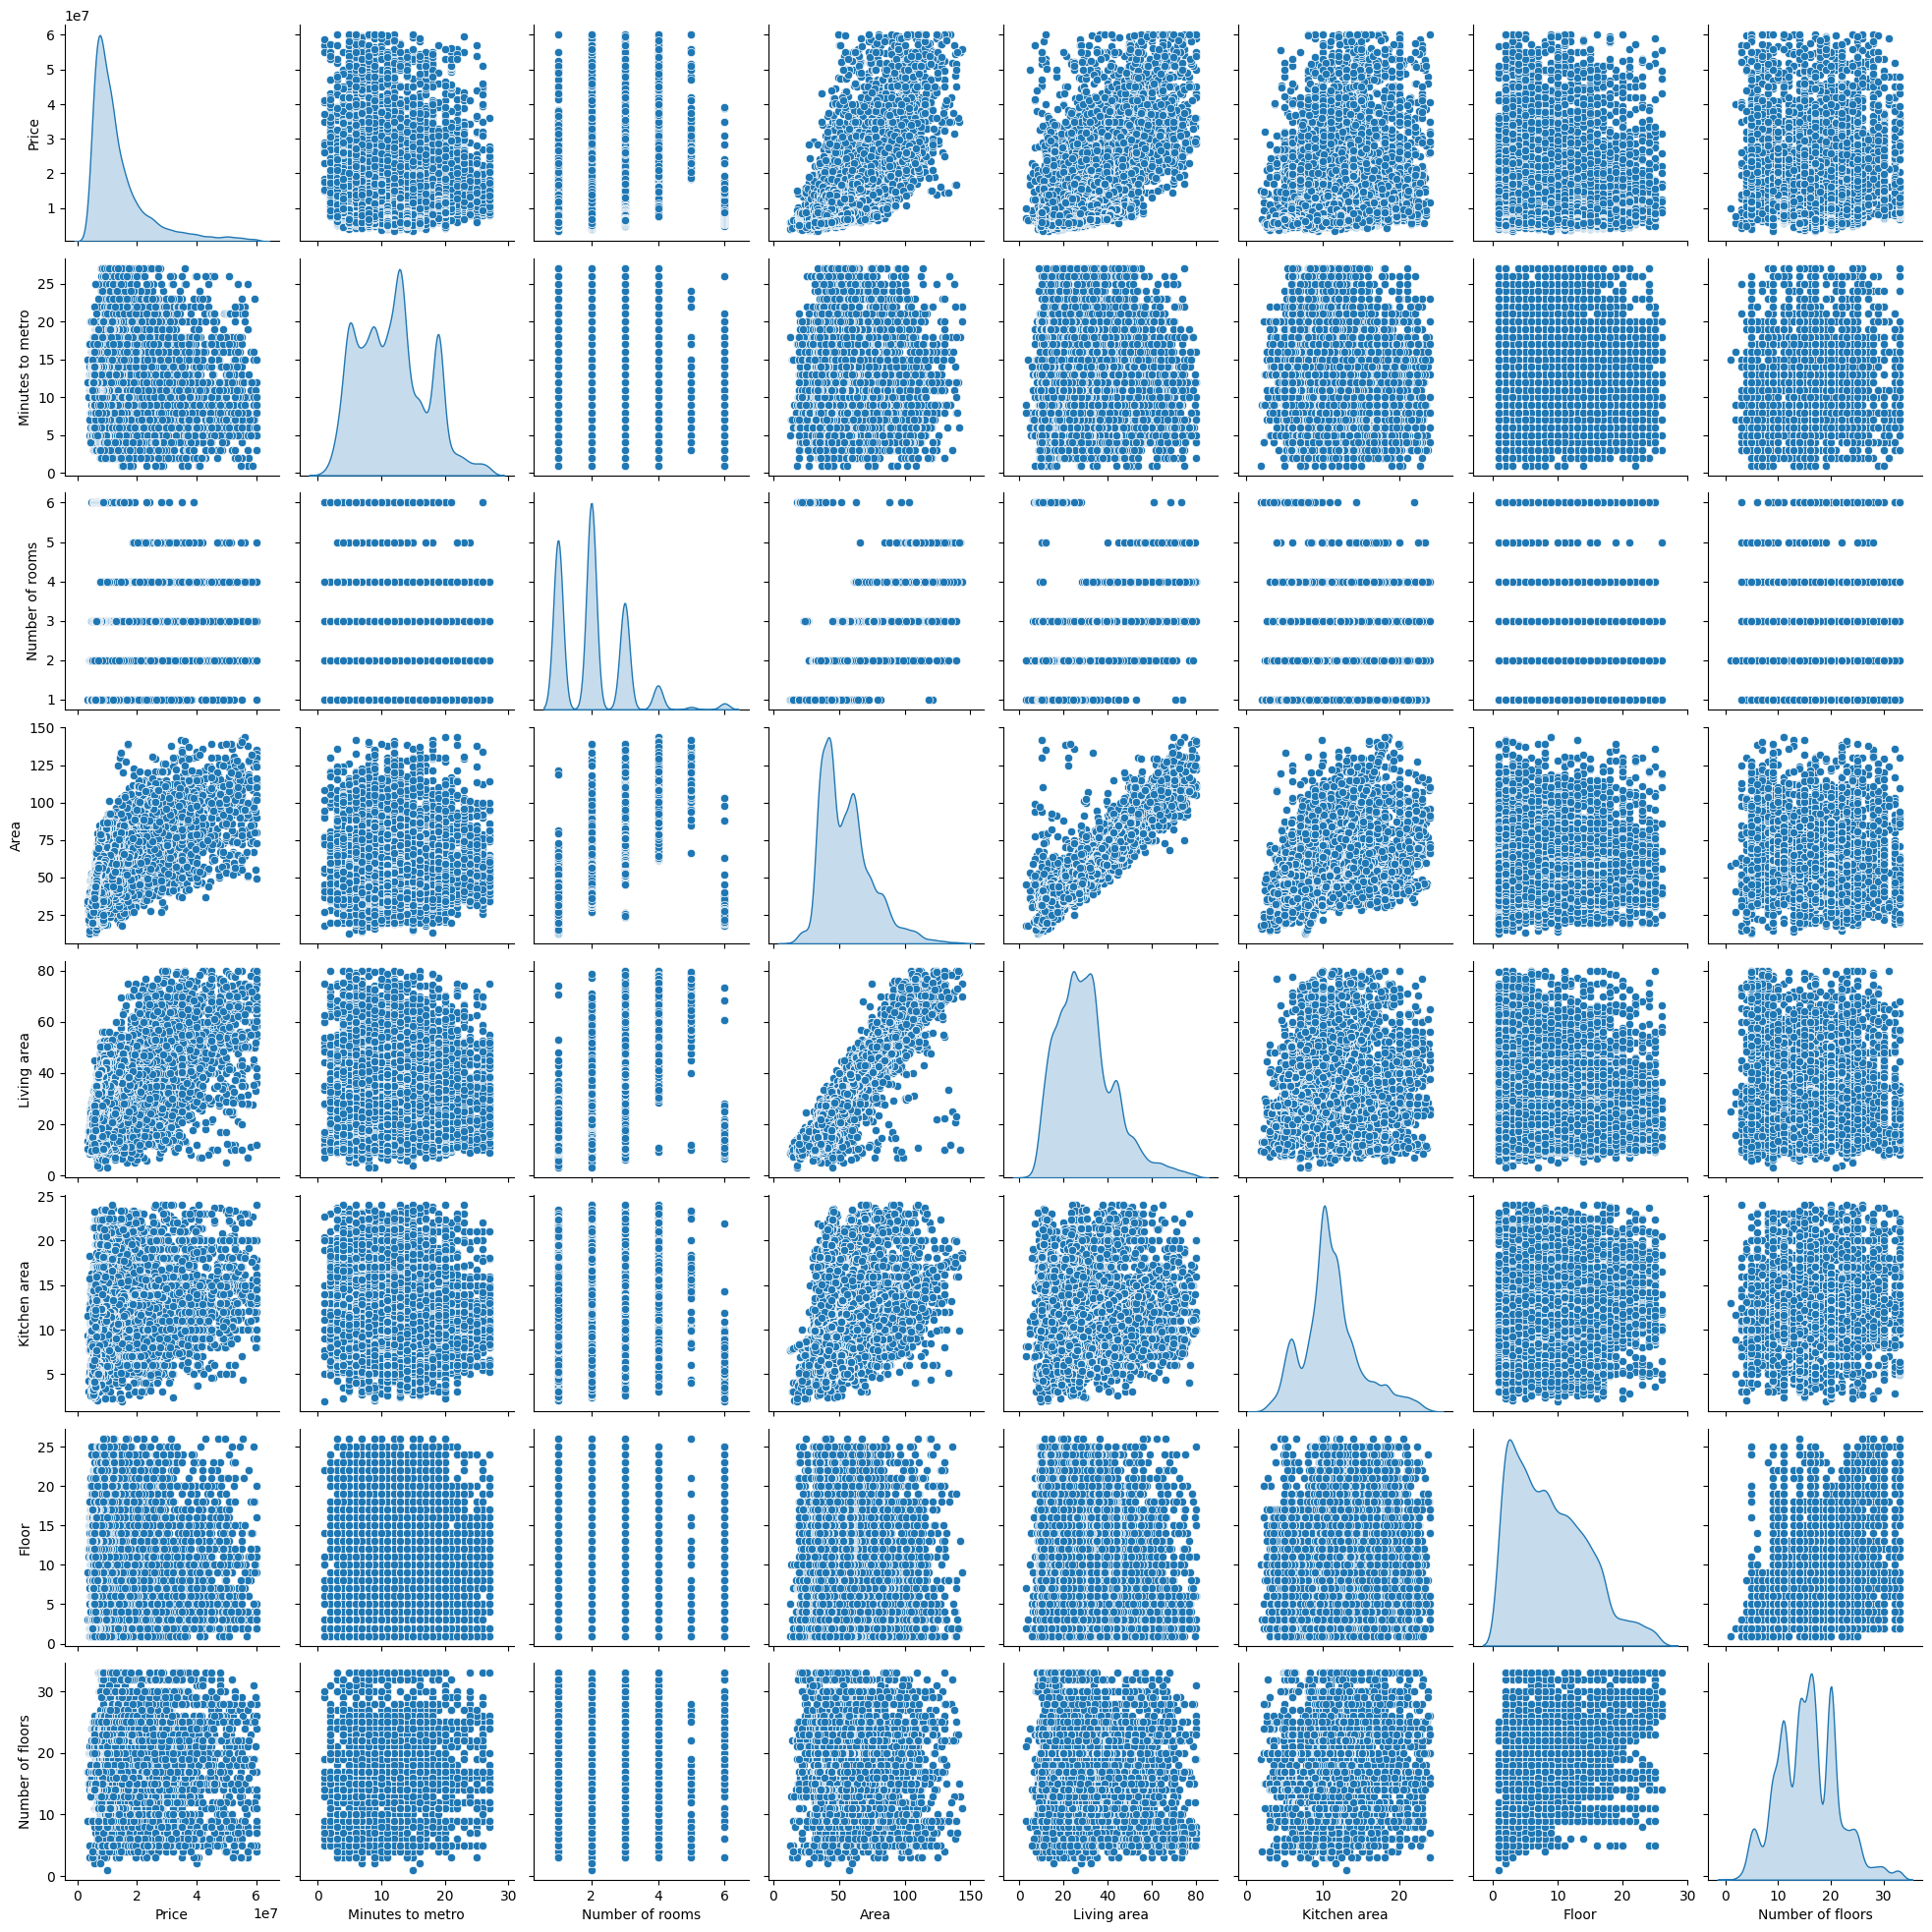

In [23]:
sns.pairplot(houses, diag_kind = 'kde')

<ipython-input-24-0131c4b40fec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = houses.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

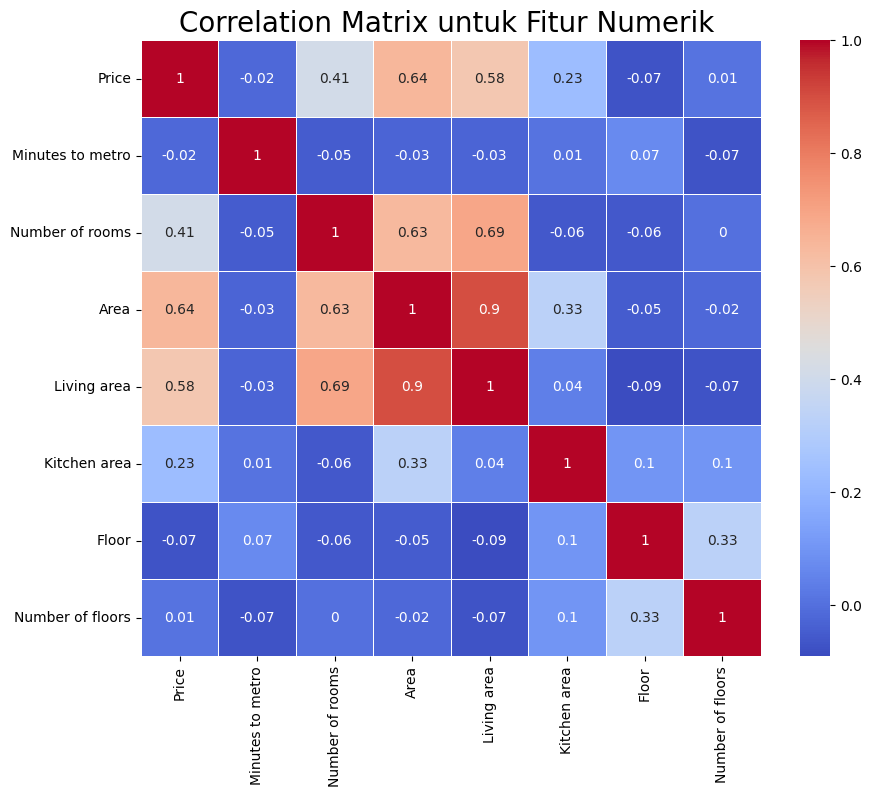

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = houses.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [25]:
houses.drop(['Minutes to metro','Kitchen area','Floor','Number of floors'], inplace=True, axis=1)
houses.head()

,Price,Apartment type,Region,Number of rooms,Area,Living area,Renovation
0,6300000.0,Secondary,Moscow region,1.0,30.6,11.1,Cosmetic
1,9000000.0,Secondary,Moscow region,1.0,49.2,20.0,European-style renovation
2,11090000.0,Secondary,Moscow region,1.0,44.7,16.2,Cosmetic
3,8300000.0,Secondary,Moscow region,1.0,35.1,16.0,European-style renovation
4,6450000.0,Secondary,Moscow region,1.0,37.7,15.2,Without renovation


# **Data Preparation**

Data Preparation merupakan tahapan penting dalam proses pengembangan model machine learning karena ini merupakan tahapan dimana dilakukan proses transformasi data menjadi bentuk yang cocok untuk proses pemodelan.

**1. Encoding**

Dalam melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding.

In [26]:
houses = pd.concat([houses, pd.get_dummies(houses['Apartment type'], prefix='Apartment type')],axis=1)
houses = pd.concat([houses, pd.get_dummies(houses['Region'], prefix='Region')],axis=1)
houses = pd.concat([houses, pd.get_dummies(houses['Renovation'], prefix='Renovation')],axis=1)
houses.drop(['Apartment type','Region','Renovation'], axis=1, inplace=True)
houses.head()

,Price,Number of rooms,Area,Living area,Apartment type_New building,Apartment type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,6300000.0,1.0,30.6,11.1,0,1,0,1,1,0,0,0
1,9000000.0,1.0,49.2,20.0,0,1,0,1,0,0,1,0
2,11090000.0,1.0,44.7,16.2,0,1,0,1,1,0,0,0
3,8300000.0,1.0,35.1,16.0,0,1,0,1,0,0,1,0
4,6450000.0,1.0,37.7,15.2,0,1,0,1,0,0,0,1


**2. Reduksi Dimensi menggunakan PCA**

Teknik ini dilakukan untuk mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik ini adalah teknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari "n-dimensional space" ke dalam sistem berkoordinat baru dengan dimensi m, dimana m lebih kecil dari n.

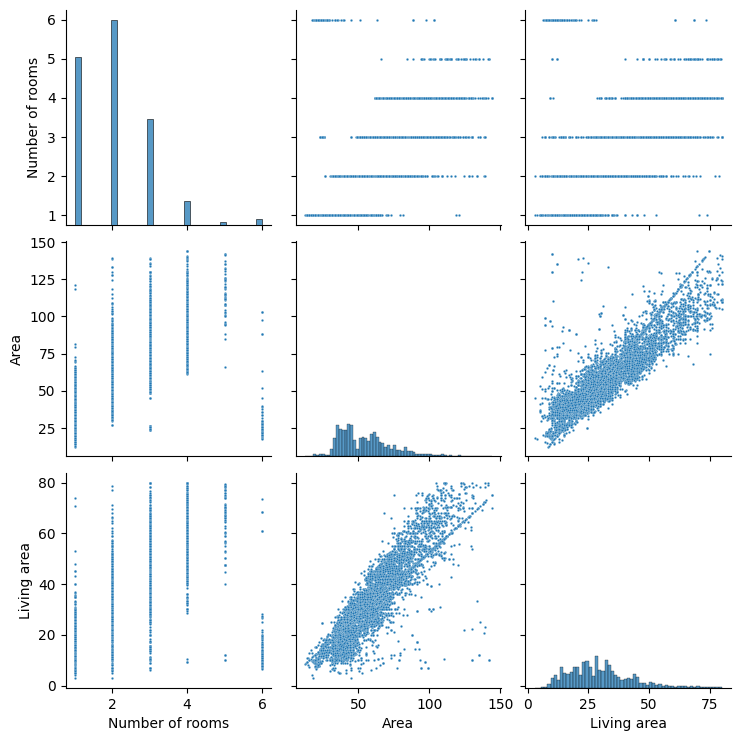

In [27]:
sns.pairplot(houses[['Number of rooms','Area','Living area']], plot_kws={"s": 3});

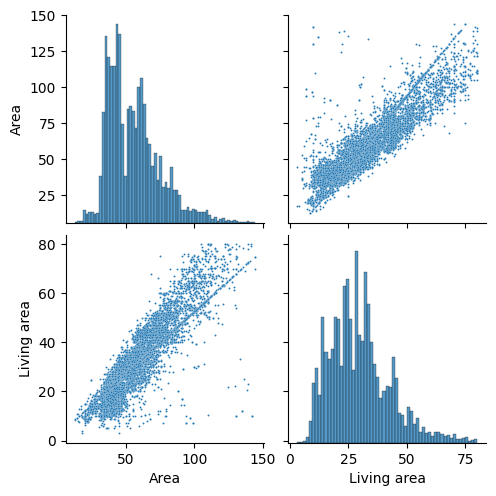

In [28]:
sns.pairplot(houses[['Area','Living area']], plot_kws={"s": 2});

In [29]:
pca = PCA(n_components=2, random_state=42)
pca.fit(houses[['Area','Living area']])
princ_comp = pca.transform(houses[['Area','Living area']])

In [30]:
pca.explained_variance_ratio_.round(3)

array([0.956, 0.044])

In [31]:
pca = PCA(n_components=1, random_state=42)
pca.fit(houses[['Area','Living area']])
houses['Areas'] = pca.transform(houses.loc[:, ('Area','Living area')]).flatten()
houses.drop(['Area','Living area'], axis=1, inplace=True)
houses.head()

,Price,Number of rooms,Apartment type_New building,Apartment type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation,Areas
0,6300000.0,1.0,0,1,0,1,1,0,0,0,-31.280529
1,9000000.0,1.0,0,1,0,1,0,0,1,0,-10.827120
2,11090000.0,1.0,0,1,0,1,1,0,0,0,-16.668836
3,8300000.0,1.0,0,1,0,1,0,0,1,0,-24.842105
4,6450000.0,1.0,0,1,0,1,0,0,0,1,-23.091864


**3. Train-Test-Split**

Membagi dataset menjadi data latih (train) dan data uji (test) sebelum membuat model. Pada kasus ini, dilakukan pembagian dataset train dan test dengan proporsi 90:10.

In [32]:
X = houses.drop(["Price"], axis=1)
y = houses["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [33]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 14662
Total # of sample in train dataset: 13195
Total # of sample in test dataset: 1467


**4. Standarisasi**

Menggunakan StandarScaler dari library *scikit-learn*. StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

In [34]:
numerical_features = ['Number of rooms','Areas']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Number of rooms,Areas
21517,2.020762,1.534558
3770,2.020762,2.505366
16855,-1.061182,-1.077675
21559,-0.033868,-0.454096
15312,-1.061182,-1.030803


In [35]:
X_train[numerical_features].describe().round(4)

,Number of rooms,Areas
count,13195.0000,13195.0000
mean,0.0000,-0.0000
std,1.0000,1.0000
min,-1.0612,-2.1018
25%,-1.0612,-0.7938
50%,-0.0339,-0.1499
75%,0.9934,0.5136
max,4.0754,4.3264


# **Model Development**

Pada tahap ini, akan dikembangkan model machine learning dengan empat algoritma, lalu akan dilakukan evaluasi performa model dengan masing-masing algoritma untuk menentukan algoritma mana yang memberi hasil prediksi terbaik. Model yang digunakan adalah sebagai berikut:


1.   Support Vector Regression (SVR)
2.   Decision Trees
3.   K-Nearest Neighbor
4.   Random Forest



In [36]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['SVR', 'Decision Trees', 'KNN', 'Random Forest'])

In [37]:
# Grid Search Support Vector Regression
svr = SVR()
param_grid_svr = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, y_train)
print("Best parameters for SVR:", grid_search_svr.best_params_)

Best parameters for SVR: {'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [38]:
# SVR dengan parameter terbaik
svr_best = SVR(**grid_search_svr.best_params_)
svr_best.fit(X_train, y_train)
models.loc['train_mse','SVR'] = mean_squared_error(y_pred=svr_best.predict(X_train), y_true=y_train)

In [39]:
# Grid Search Decision Trees
dt = DecisionTreeRegressor()
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)
print("Best parameters for Decision Trees:", grid_search_dt.best_params_)

Best parameters for Decision Trees: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [40]:
# Decision Trees dengan parameter terbaik
dt_best = DecisionTreeRegressor(**grid_search_dt.best_params_)
dt_best.fit(X_train, y_train)
models.loc['train_mse','Decision Trees'] = mean_squared_error(y_pred=dt_best.predict(X_train), y_true=y_train)

In [41]:
# Grid Search K-Nearest Neighbor
knn = KNeighborsRegressor()
param_grid_knn = {'n_neighbors': range(1, 21)}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)
print("Best n_neighbors:", grid_search_knn.best_params_)

Best n_neighbors: {'n_neighbors': 15}


In [42]:
# K-Nearest Neighbor dengan parameter terbaik
knn_best = KNeighborsRegressor(**grid_search_knn.best_params_)
knn_best.fit(X_train, y_train)
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn_best.predict(X_train), y_true=y_train)

In [43]:
# Grid Search Random Forest
param_grid_rf = {
  'n_estimators': [10, 50, 100, 200],
  'max_depth': [None, 10, 20, 30, 40, 50],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10]
}
RF = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_rf = GridSearchCV(RF, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
print("Best parameters:", grid_search_rf.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [44]:
# Random Forest dengan parameter terbaik
RF_best = RandomForestRegressor(**grid_search_rf.best_params_)
RF_best.fit(X_train, y_train)
models.loc['train_mse','Random Forest'] = mean_squared_error(y_pred=RF_best.predict(X_train), y_true=y_train)

# **Evaluasi Model**

Metrik yang digunakan untuk evaluasi model adalah Mean Squared Error, dimana MSE menghitung selisih antara nilai prediksi model dan nilai sebenarnya dari data, kemudian mengkuadratkan selisih yang diperoleh agar tidak ada selisih yang memiliki nilai negatif. Lalu, selisih kuadrat kemudian dijumlahkan dan diambil sebagai rata-rata dari semua sampel data.

In [45]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [46]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['SVR','Decision Trees', 'KNN', 'Random Forest'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'SVR': svr_best, 'Decision Trees': dt_best, 'KNN': knn_best, 'Random Forest': RF_best}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
SVR,86051881127.030975,87820728254.917694
Decision Trees,16267242476.414715,25450620244.534927
KNN,18167566509.839661,23294296282.151714
Random Forest,14611530632.471609,22247655202.370575


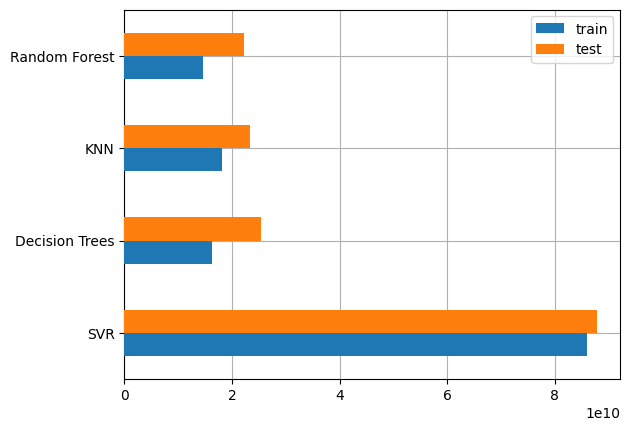

In [47]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [48]:
prediksi = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_SVR,prediksi_Decision Trees,prediksi_KNN,prediksi_Random Forest
4201,6923590.0,12145526.6,12714969.6,10957071.5,10756553.6
18108,5838315.0,9542192.9,5853908.2,5963878.6,6175396.9
19304,7571718.0,9894654.1,7904677.2,7725579.8,7783419.0
5832,12000000.0,10439436.9,10646798.2,10866197.6,10904275.3
4795,18990000.0,10758041.8,16716315.8,18132000.0,16372857.7
